In [2]:
import cv2
import cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
from sklearn.cluster import k_means
from sklearn.decomposition import PCA
from scipy.fftpack import dct
from sklearn import preprocessing
from sklearn.svm import SVC
from featurizer import Featurizer,convert_lab
from colorizer import Colorizer


In [3]:
test_image = skio.imread("images/grass3.jpg")
def get_grayscale(image):
    gray = cv2.cvtColor(image, cv.CV_BGR2GRAY)
    return cv2.merge((gray,gray,gray))
gray_test = get_grayscale(test_image)

In [4]:
training_images = ["images/grass1.jpg","images/grass2.jpg"]
#getting the right featurizer
f = Featurizer(training_images)
f.compute_k_means()
print "Getting features..."
f.compute_features()

Cluster Centers...
[[  82.52347388  149.48347388]
 [ 136.38471308  153.43609933]
 [ 125.26155384  142.10006965]
 [  92.93283494  154.38273302]
 [ 147.99009018  165.13607973]
 [  88.11741793  146.62996589]
 [ 152.83352347  156.64218197]
 [ 134.43859419  131.4726466 ]
 [ 144.00540186  143.72831684]
 [ 105.28045275  132.01805605]]
Getting features...
SURF Features...
DFT Features...
Meanvar Features...
SURF Features...
DFT Features...
Meanvar Features...


/home/vashishtm/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:775: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


In [ ]:
#getting the right colorizer
colorizer = Colorizer(f)
print "Starting Training of SVMs..."
colorizer.train()

In [ ]:
#running the experiment
print "Colorizing Image..."
colored_image = colorizer.color_image(gray_test)

Grayscale Image


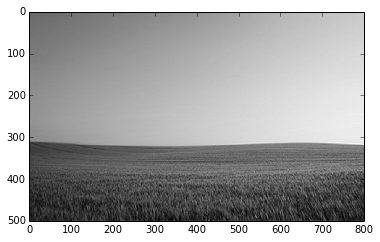

Colorized Image


In [4]:
print "Grayscale Image"
%matplotlib inline  
skio.imshow(gray_test)
skio.show()
#Image(filename="results/grayscale.jpg")


print "Colorized Image"
#skio.imshow(colored_image)
#skio.show()
#skio.imsave("results/" + test_image.split("/")[1],colored_image)

In [40]:
surf = cv2.DescriptorExtractor_create("SURF")
surf.setBool('extended',True)
print dir(surf)
print cv2.__version__

['__class__', '__delattr__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'compute', 'empty', 'getAlgorithm', 'getBool', 'getDouble', 'getInt', 'getMat', 'getMatVector', 'getParams', 'getString', 'paramHelp', 'paramType', 'setAlgorithm', 'setBool', 'setDouble', 'setInt', 'setMat', 'setMatVector', 'setString']
2.4.6.1


In [39]:
keypoints = [cv2.KeyPoint(x,y,20) for x in range(10) for y in range(10)]
surf.compute(gray_test,keypoints)[1].shape

(100, 128)

([], None)
